### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load csv file
titanic=pd.read_csv("E:\\Data Science\\Data science Practise project\\titanic_train.csv",index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here i make column "PassengerId" as a index, because "passengerID" is a unique data, it means every passenger has separate or unique ID.No repeatation is there

In [3]:
titanic.shape

(891, 11)

our dataset has 891 rows and 11 columns

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Our dataset has 11 column , out of 11 columns 4 columns has datatype integer, 5 column has datatype Object and 2 columns has datatype Float, column "Age","Embarked" and "cabin" has Null Values

In [5]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Titanic dataset has 11 column, in column "Age" it has 177 null values, for column"cabin" 687 null values and for "Embarked" column ,it has only 2 null values

In [6]:
titanic["Age"]=titanic["Age"].replace(np.nan,titanic['Age'].mean())

The null value in feature "Age" is replaced by mean of column "Age".we use mean because datatype in "Age"is continous,

In [7]:
mode1=titanic['Embarked'].mode()
mode1

0    S
dtype: object

Column "Embarked" is categorical data type column,first we find mode of column "Embarked", the mode is 'S',mode means maximum time "S" occurs

In [8]:
titanic['Embarked']=titanic['Embarked'].fillna(mode1[0])

Here we replaced nan value by mode value

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Here we fill Nan values of "Age" and "Embarked", The column "cabin" has null value 687 out of 891, it means 77 percent data in the column"Cabin" is Nan, so no need of Imputation, we will drop this column

In [10]:
titanic=titanic.drop(columns=['Cabin','Name','Ticket'],axis=1)

Here we drop 3 columns,"Cabin" has most Nan Value, so we drop it, the column "Name" and "Ticket" is object data type, this two column is not important for our model building, so we drop it

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


This is our final dataset now

In [12]:
titanic.shape

(891, 8)

Now our dataset 'Titanic' has 891 rows with 8 columns , Column "Survived"is Target or label, and remaining columns are feature

In [13]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We get stastical analysis of dataset, we get mean and standard deviation of each column, min and max shows minimum and maximum value of each column.25% denotes first quartle of data,50% denotes second quartile,and 75% denotes third quartile of dataframe

In [14]:
pd.set_option('display.max_row',None)

This command will display all contains the features

In [15]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

count 0 has count 549 and 1 has count 342, 1 can be considered as survived and 0 is considered as not survived

# Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

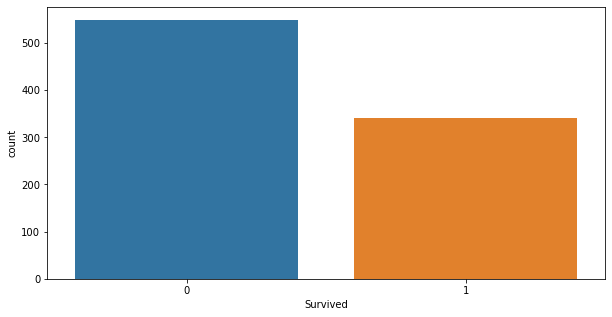

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Survived'])

here we plot count plot for label "Survived", which is balanced dataset, so no need of SMOTE imbalance

In [17]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

feature "Pclass" has 3 class, class 3 has frequency 491, class 2 has frequency 216 and class 1 hasfrequency 184

<AxesSubplot:xlabel='Pclass', ylabel='count'>

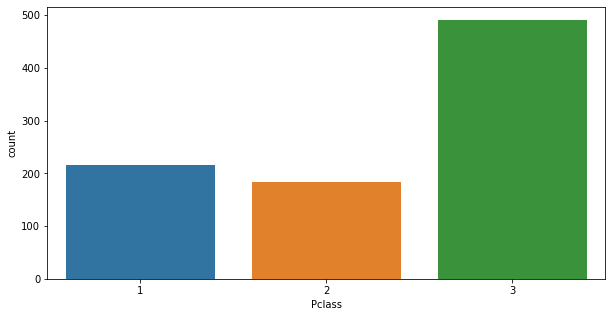

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Pclass'])

Here we plot countplot for feature "Pclass"

In [19]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Feature "Sex" has male count 577 and female count is 314

<AxesSubplot:xlabel='Sex', ylabel='count'>

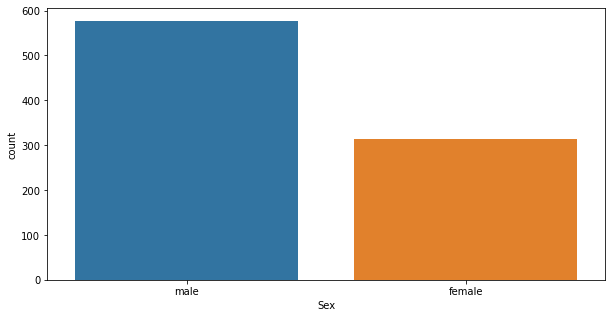

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Sex'])

Here we plot countplot for feature "sex"

In [21]:
titanic['Sex']=titanic['Sex'].replace(['male','female'],[0,1])

here we use nominal encoding to replace text data, we replaced "male" by 0 and "female"by 1

In [22]:
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

we checked count for 0 and 1 , which is same as previous

<AxesSubplot:xlabel='Sex', ylabel='count'>

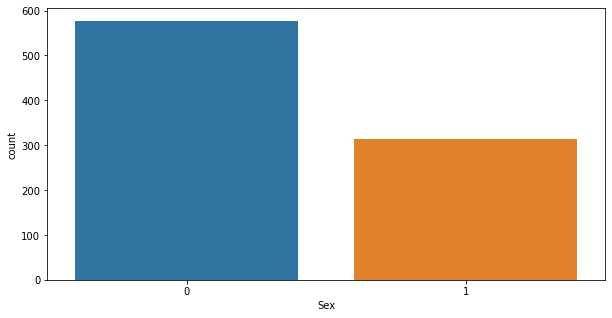

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Sex'])

In [24]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

feature "Sibsp"has total 7 class, class 0 has count 608, class 1 has count 209, class 2 has count 28, class 4 has count 18,class 3 count is 16, class 8 count is 7 and class 5 has count 5

<AxesSubplot:xlabel='SibSp', ylabel='count'>

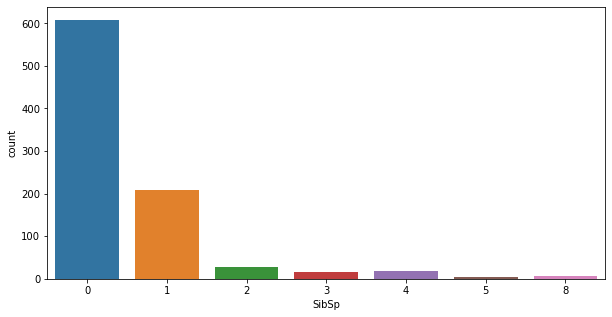

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['SibSp'])

In [26]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

feature "Parch" has  total 7 class from 0 to 6, class 0 has count 678, class 1 has count 118, class 2 has count 80, class 3 has count 5,class 4 has count 4, class 5 count is 5 and class 6 count is 1

<AxesSubplot:xlabel='Parch', ylabel='count'>

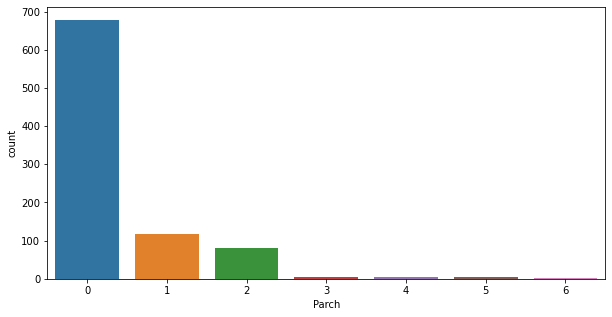

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Parch'])

In [28]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In feature "Embarked",class "S" has 646, class " C" has count 168 and class 'Q' has count 77

<AxesSubplot:xlabel='Embarked', ylabel='count'>

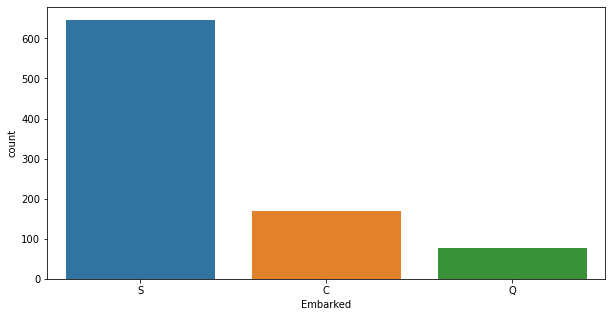

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Embarked'])

In [30]:
titanic['Embarked']=titanic['Embarked'].replace(['S','C','Q'],[0,1,2])

here we used nominal encoding to replace text data by numbers, " S" is replaced as 0, "C" is replaced as 1,"Q"is replaced as 2

In [31]:
titanic['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

we check count which is same as previous

<AxesSubplot:xlabel='Embarked', ylabel='count'>

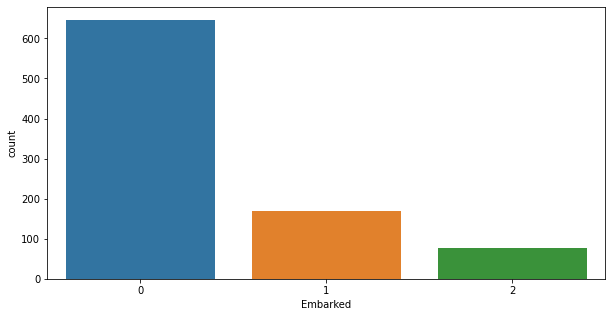

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(titanic['Embarked'])

In [33]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


we again see dataframe after encoding

Two features in the dataframe are continous type, they are "Age" and Second one is Fare, so we use histplot to visualize them

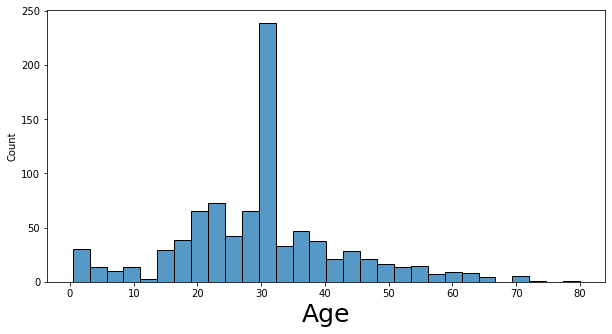

In [34]:
plt.figure(figsize=(10,5))  # here we give row and column dimensions
x=sns.histplot(titanic['Age'])  # histplot of "Age"  is plotted
plt.xlabel('Age',fontsize=25)  # x axis label is 'Age'
plt.show()  # disply graph

by observing Histplot for Age we can say that most of people belongs 20 to near about 50 group,people of age 60 to 70 are very less number

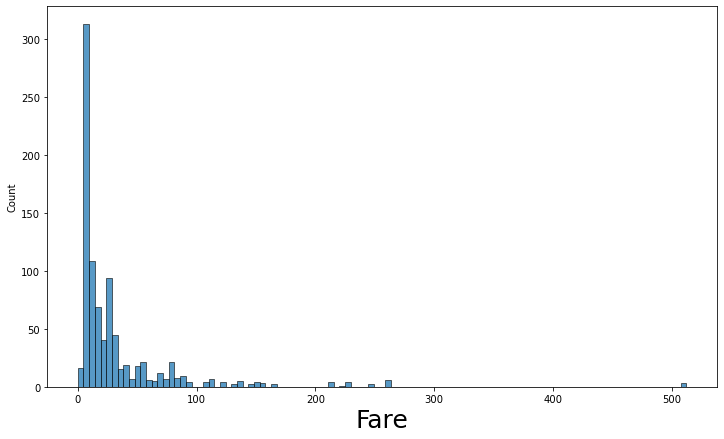

In [35]:
plt.figure(figsize=(12,7))# here we give row and column dimensions
x=sns.histplot(titanic['Fare'])# histplot of "Fare"  is plotted
plt.xlabel('Fare',fontsize=25) # x axis label is 'Age'
plt.show()# disply graph

By observing "fare" column, we can say that most of people has fare between 0 to 100 , after 200 only few people has high fare

In [36]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### There is no null values in our dataset, In this dataset "Survived" is our Target or Label, which has two category 0 or 1, 0 means "not survived" and 1 means "survived", so our problem is classification type

In [37]:
#titanic['Age']=np.sqrt(titanic['Age'])
#titanic['Fare']=np.sqrt(titanic['Fare'])

In [38]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0
2,1,1,1,38.000000,1,0,71.2833,1
3,1,3,1,26.000000,0,0,7.9250,0
4,1,1,1,35.000000,1,0,53.1000,0
5,0,3,0,35.000000,0,0,8.0500,0
6,0,3,0,29.699118,0,0,8.4583,2
7,0,1,0,54.000000,0,0,51.8625,0
8,0,3,0,2.000000,3,1,21.0750,0
9,1,3,1,27.000000,0,2,11.1333,0


 lets draw the Box plot to indentify the outlier in the the dataframe
now we will see any outlier present in our dataset using box plot

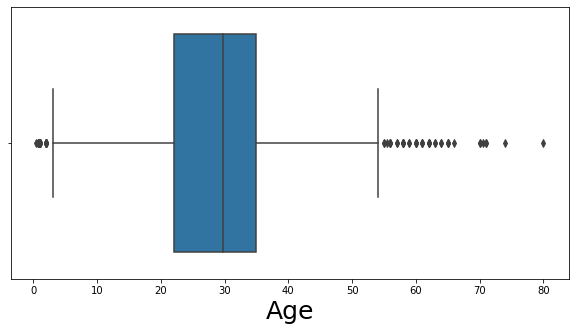

In [39]:
plt.figure(figsize=(10,5))  # we give row and column dimension
x=sns.boxplot(titanic['Age']) # Age boxplot is given
plt.xlabel('Age',fontsize=25)# label for x axis is "Age"
plt.show() # display graph

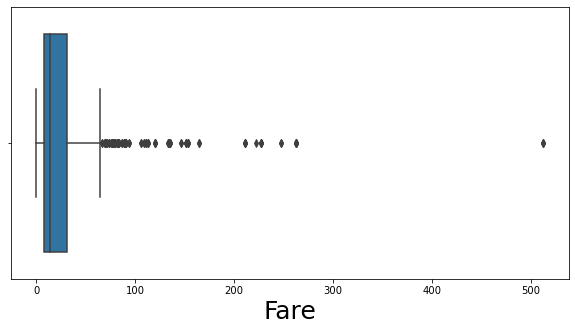

In [40]:
plt.figure(figsize=(10,5))# we give row and column dimension
x=sns.boxplot(titanic['Fare'])# 'Fare' boxplot is given
plt.xlabel('Fare',fontsize=25)# label for x axis is "Fare"
plt.show()

In Box plot,feature'Age','Fare', has outliers above third quartile,we use quantile method to remove this outliers

In [41]:
q=titanic['Age'].quantile(0.92)  # the data above 95 % of column 'Age' is considered as outlier
titanic=titanic[titanic['Age']<q] # we assign new data to same column
q=titanic['Fare'].quantile(0.96)  #the data above 98 % of column 'Fare' is considered as outlier
titanic=titanic[titanic['Fare']<q] # we assign new data to same column


In [42]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

we see no null values in the dataset, if we decrease the quantile range, then Nan value is created and more data get lost 

 now we will see any outlier is reduced in our dataset or not using box plot

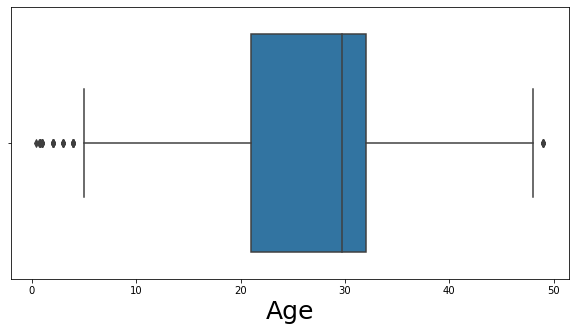

In [43]:
plt.figure(figsize=(10,5))
x=sns.boxplot(titanic['Age'])
plt.xlabel('Age',fontsize=25)
plt.show()

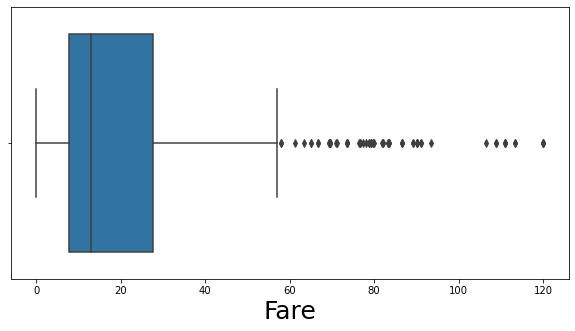

In [44]:
plt.figure(figsize=(10,5))
x=sns.boxplot(titanic['Fare'])
plt.xlabel('Fare',fontsize=25)
plt.show()

In [45]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(titanic['Age']))
titanic['Age']=titanic['Age'][(z<3)]  # z score with std deviation =3

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution

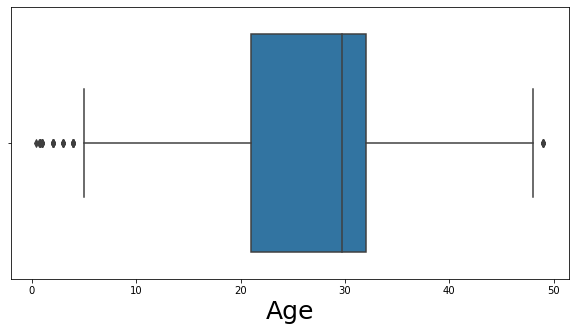

In [46]:
plt.figure(figsize=(10,5))
x=sns.boxplot(titanic['Age'])
plt.xlabel('Age',fontsize=25)
plt.show()

In [47]:
# lets use z score to remove outliers
#from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
#z=np.abs(zscore(titanic['Fare']))
#titanic['Fare']=titanic['Fare'][(z<3)]  # z score with std deviation =3

In [48]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [49]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
#q1=titanic['Age'].quantile(0.25)
# 3 rd Quartile
#q3=titanic['Age'].quantile(0.75)
#iqr=q3-q1
# Outlier detection formula
#higher=q3+(1.5*iqr)  # uppar bound
#lower=q1-(1.5*iqr)  # lower bound

In [50]:
titanic.shape

(784, 8)

shape is reduced from 891 to 825 which is 8 percent loss

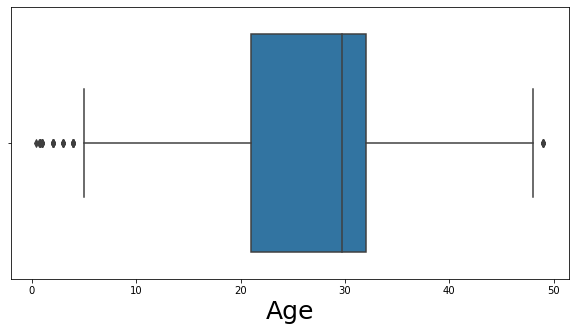

In [51]:
plt.figure(figsize=(10,5))
x=sns.boxplot(titanic['Age'])
plt.xlabel('Age',fontsize=25)
plt.show()

In [52]:
#titanic.isnull().sum()

In [53]:
#lets use z score to remove outliers
#from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
#z=np.abs(zscore(titanic['Fare']))
#titanic['Fare']=titanic['Fare'][(z<3)]  # z score with std deviation =3

In [54]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
#q1_=titanic['Fare'].quantile(0.25)
# 3 rd Quartile
#q3_=titanic['Fare'].quantile(0.75)
#iqr_=q3_-q1_
# Outlier detection formula
#higher1=q3_+(1.5*iqr_)  # uppar bound
#lower1=q1_-(1.5*iqr_)  # lower bound

we will not use z score and IQR method, which create more problem further, that is it create Nan Value in data

In [55]:
titanic.shape

(784, 8)

In [56]:
825/891

0.9259259259259259

In [57]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

This is final check for any Nan value created during preprocessing, no such value is created

In [58]:
titanic['Age']=np.sqrt(titanic['Age'])
titanic['Fare']=np.sqrt(titanic['Fare'])

Generallt square root transformation is used when data is moderately skewed,and has modearate effect on distribution shape. it is generally used to reduce right skewed data

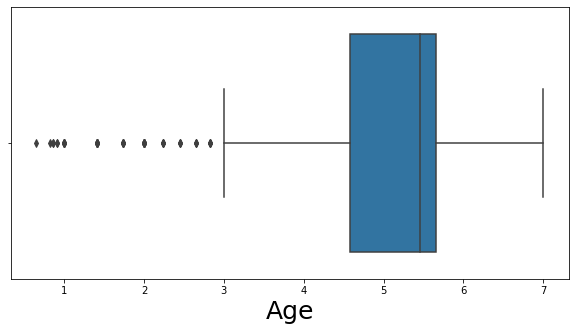

In [59]:
plt.figure(figsize=(10,5))
x=sns.boxplot(titanic['Age'])
plt.xlabel('Age',fontsize=25)
plt.show()

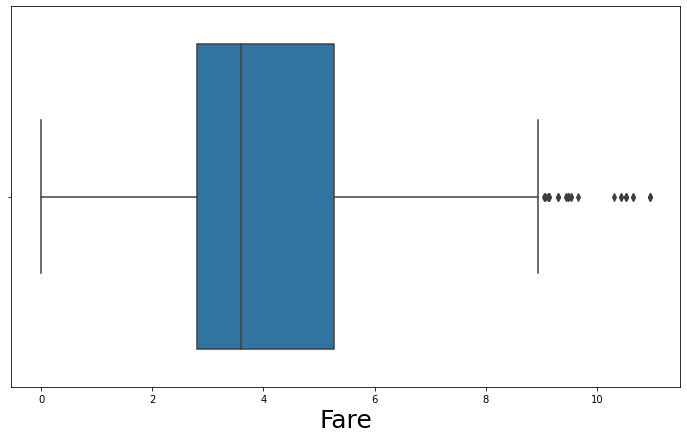

In [60]:
plt.figure(figsize=(12,7))
x=sns.boxplot(titanic['Fare'])
plt.xlabel('Fare',fontsize=25)
plt.show()

In [61]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

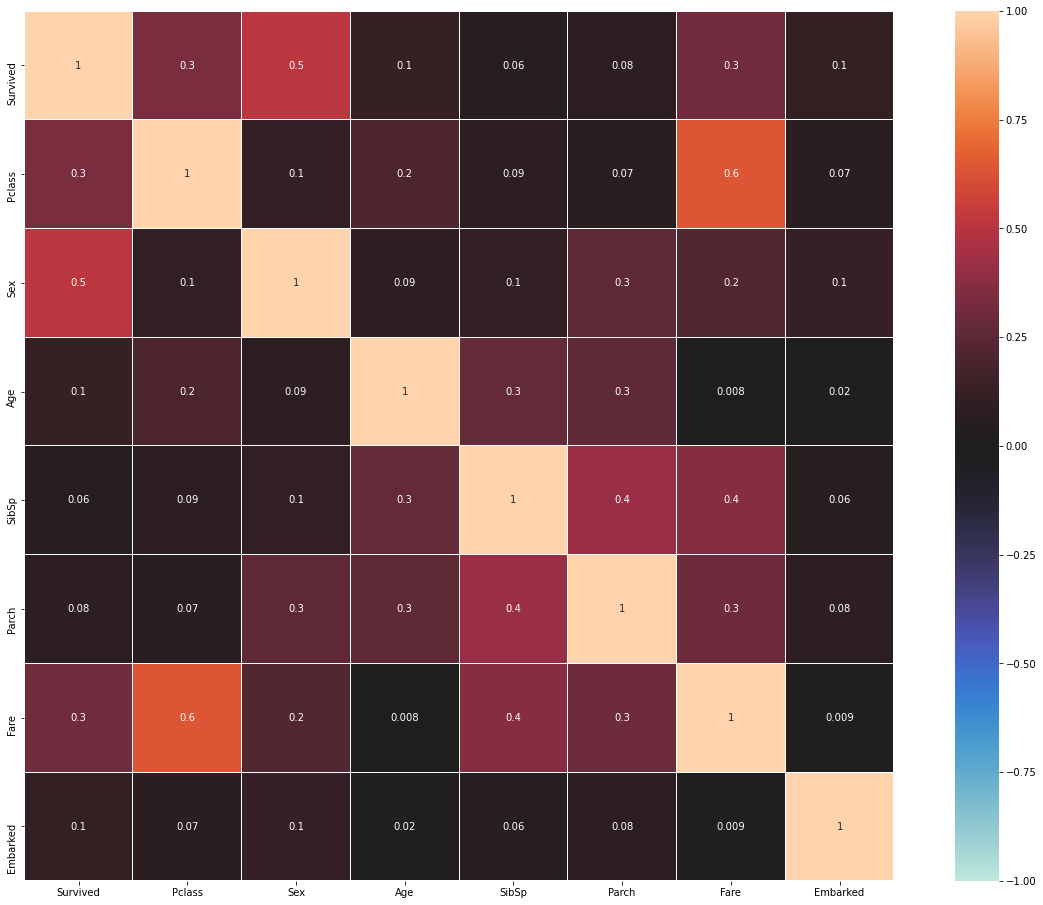

In [62]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=titanic.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label,the value o.o1 to 0.09 shows neglegible correlation between features

In [63]:
corr_matrix=titanic.corr()   # here we get values of correlation in descending order
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.512486
Fare        0.312213
Embarked    0.111456
Parch       0.080485
SibSp      -0.057045
Age        -0.122961
Pclass     -0.342684
Name: Survived, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable

In [64]:
titanic['Survived'].value_counts()

0    493
1    291
Name: Survived, dtype: int64

No imbalance in the Target column

In [65]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,4.690416,1,0,2.692582,0
2,1,1,1,6.164414,1,0,8.442944,1
3,1,3,1,5.099020,0,0,2.815138,0
4,1,1,1,5.916080,1,0,7.286975,0
5,0,3,0,5.916080,0,0,2.837252,0
6,0,3,0,5.449690,0,0,2.908316,2
8,0,3,0,1.414214,3,1,4.590752,0
9,1,3,1,5.196152,0,2,3.336660,0
10,1,2,1,3.741657,1,0,5.483685,1


In [66]:
list=['Age','Fare']

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
titanic[list]=scaler.fit_transform(titanic[list])

MinMaxScaler is used when data is skewed, it will transform data in the range of 0 to 1,0 is minimum and 1 is maximum boundary for data

In [68]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,0.636396,1,0,0.245798,0
2,1,1,1,0.868452,1,0,0.770732,1
3,1,3,1,0.700724,0,0,0.256986,0
4,1,1,1,0.829356,1,0,0.665207,0
5,0,3,0,0.829356,0,0,0.259005,0
6,0,3,0,0.755931,0,0,0.265492,2
8,0,3,0,0.120615,3,1,0.419076,0
9,1,3,1,0.716016,0,2,0.304594,0
10,1,2,1,0.487031,1,0,0.500590,1


In [69]:
x=titanic.drop(columns=['Survived'])
y=titanic['Survived']

here we separated features from labels

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [71]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8418367346938775 on Random state 25


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
regression=LogisticRegression()
regression.fit(x_train,y_train)
pred1=regression.predict(x_test)
Log_accuracy_score=accuracy_score(y_test,pred1)
print(Log_accuracy_score)

0.8163265306122449


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [75]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
pred2=DTC.predict(x_test)# predict output according test data
DTC_accuracy_score=accuracy_score(y_test,pred2) #here we compared y_test with predicted output
print(DTC_accuracy_score)

0.8367346938775511


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [76]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
pred3=KNC.predict(x_test)# predict output according test data
KNC_accuracy_score=accuracy_score(y_test,pred3) #here we compared y_test with predicted output
print(KNC_accuracy_score)

0.8418367346938775


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [77]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
pred4=svc.predict(x_test) #predict output according test data
svc_accuracy_score=accuracy_score(y_test,pred4) #here we compared y_test with predicted output
print(svc_accuracy_score)

0.8571428571428571


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [78]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
pred5=RFC.predict(x_test) #predict label according test feature
RFC_accuracy_score=accuracy_score(y_test,pred5)#here we compared test label with predicted label
print(RFC_accuracy_score)

0.8520408163265306


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [79]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
pred6=GBC.predict(x_test) #predict label according test feature
GBC_accuracy_score=accuracy_score(y_test,pred6)#here we compared test label with predicted label
print(GBC_accuracy_score)

0.8724489795918368


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [80]:
# now we will perform cross validation
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [81]:
Log_reg_CV_score=cross_val_score(regression,x,y,cv=5).mean() 
Log_reg_CV_score

0.7857341172627796

In [82]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean()  # here we pass Decision tree model along with scaled input and label, cv=5 is used for all
DTC_CV_score

0.7691572758451739

In [83]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean()# here we pass Kneighbors model along with scaled input and label, cv=5 is used for all
KNC_CV_score

0.7933774293646904

In [84]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean()# here we pass  support vector model along with scaled input and label, cv=5 is used for all
svc_CV_score

0.8074065000816594

In [85]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean()# here we pass Random Forest model along with scaled input and label, cv=5 is used for all
RFC_CV_score

0.8074554956720561

In [86]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean()# here we pass Random Forest model along with scaled input and label, cv=5 is used for all
GBC_CV_score

0.8240078392944635

In [87]:
Logistic_regression_diff=Log_accuracy_score*100-Log_reg_CV_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy_score*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy_score*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy_score*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy_score*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy_score*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)

Logistic_regression_diff 3.0592413349465204
DTC_diff 6.757741803237721
KNC_diff 4.845930532918715
svc_diff 4.973635706119765
RFC_diff 4.458532065447443
GBC_diff 4.844114029737327


In [88]:
print("Log_accuracy_score",Log_accuracy_score)
print("Log_reg_CV_score", Log_reg_CV_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy_score",DTC_accuracy_score)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy_score",KNC_accuracy_score)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy_score",svc_accuracy_score)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy_score",RFC_accuracy_score)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)
print("-------------------------------------------------------------------------------------------")
print("GBC_accuracy_score",GBC_accuracy_score)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

Log_accuracy_score 0.8163265306122449
Log_reg_CV_score 0.7857341172627796
Logistic_regression_diff 3.0592413349465204
-------------------------------------------------------------------------------------------
DTC_accuracy_score 0.8367346938775511
DTC_CV_score 0.7691572758451739
DTC_diff 6.757741803237721
-------------------------------------------------------------------------------------------
KNC_accuracy_score 0.8418367346938775
KNC_CV_score 0.7933774293646904
KNC_diff 4.845930532918715
-------------------------------------------------------------------------------------------
svc_accuracy_score 0.8571428571428571
svc_CV_score 0.8074065000816594
svc_diff 4.973635706119765
-------------------------------------------------------------------------------------------
RFC_accuracy_score 0.8520408163265306
RFC_CV_score 0.8074554956720561
RFC_diff 4.458532065447443
-------------------------------------------------------------------------------------------
GBC_accuracy_score 0.8724489795918

here i choose Gradient Boost classifier as a best model,because it has highest accuracy score as well as CV score, for KNC and Logistic regression although difference is less than GBC, but it has less accuracy score and cv score than GBC

In [89]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach whcu build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [90]:
params={'max_depth':range(4,12,2),
       'learning_rate':np.arange(0.1,1,0.1),
       'min_samples_split':range(4,8,2),
       'min_samples_leaf':[1,2,3,4]}

In [91]:
GBC_best=GridSearchCV(GradientBoostingClassifier(),params,cv=5)
GBC_best.fit(x_train,y_train)
GBC_best.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

now we will pass this best parameter to GradientBoosting Classifier

In [96]:
GBC_Final_model=GradientBoostingClassifier(max_depth=4,learning_rate=0.1,min_samples_split=6 ,min_samples_leaf=2)
GBC_Final_model.fit(x_train,y_train)
final_pred=GBC_Final_model.predict(x_test)
GBC_final_acc=accuracy_score(y_test,final_pred)
print(GBC_final_acc*100)

87.24489795918367


after hyperparameter tuning we get this accuracy

In [93]:
from sklearn.metrics import confusion_matrix
GBC_cfm=confusion_matrix(y_test,final_pred)
GBC_cfm

array([[113,  13],
       [ 12,  58]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN

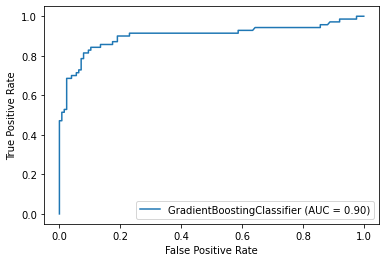

In [97]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(GBC_Final_model,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our support vector classifier ROC curve cover 90% area under it.¶

In [95]:
import joblib
joblib.dump(GBC_Final_model,"Titanic.pkl")

['Titanic.pkl']